# The Sparks Foundation - GRIP June 2021

## Task 1 - Prediction using Supervised ML

### Author : Kunal

## Problem Statement :
* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing Libraries

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data collection and Pre-processing

In [2]:
# loading dataset into pandas dataframe
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

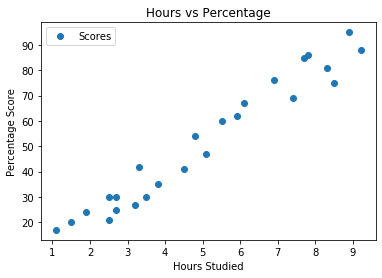

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Data Preparation

In [7]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values
print('Data prepared Successfully')

Data prepared Successfully


## Train - Test Split

In [8]:
#Spliting Data Using Scikit-Learn's built-in train_test_split()
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(" X_train = ",X_train.shape)
print(" X_test = ",X_test.shape)
print(" Y_train = ",Y_train.shape)
print(" Y_test = ",Y_test.shape)


 X_train =  (20, 1)
 X_test =  (5, 1)
 Y_train =  (20,)
 Y_test =  (5,)


## Model Training

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# intercept
print("Intercept : ",reg.intercept_)

Intercept :  2.018160041434662


In [12]:
# coefficient
print("Coefficient : ",reg.coef_)

Coefficient :  [9.91065648]


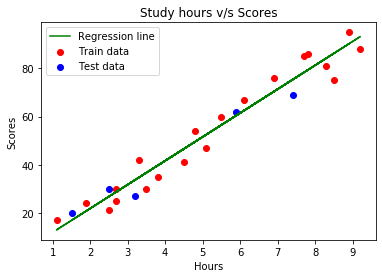

In [13]:
# plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X_train, Y_train, label = "Train data", color = 'red')
plt.scatter(X_test, Y_test, label = "Test data", color = 'blue')
plt.title("Study hours v/s Scores")
plt.plot(X, line, color = 'green', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

## Making Prediction

In [14]:
print(X_test) # Testing data - In Hours
Y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [16]:
#Comparing Actual vs Predicted
c_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
c_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


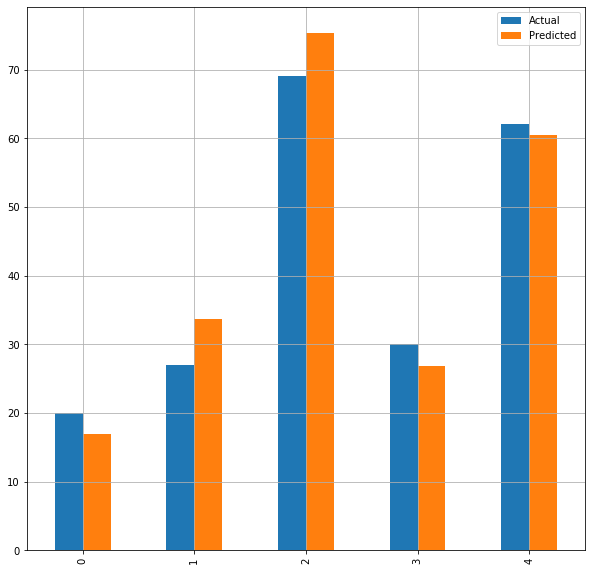

In [17]:
# plotting actual v/s predicted
c_df.plot(kind = 'bar', figsize = (10,10))
plt.grid()
plt.show()

### Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
pred = reg.predict([hours])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = [9.25]
Predicted Score = 93.69173248737539


## Model Evaluation

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


## Conclusion

* If the student studies for 9.25 hrs/ day, the predicted score will be 93.45

# Task 1 Completed